\newpage

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
from ucimlrepo import fetch_ucirepo 

heart_disease = fetch_ucirepo(id=45) 
  

1. Define and describe a classification problem using the dataset.

This dataset is intended to predict the severity of heart disease in individuals based on various medical attributes. The target variable `num` is a multiclass classification that indicates the severity of the disease, ranging from 0 to 4. The dataset includes 13 features, including `age`, `sex`, `cp`, `trestbps `, `chol`, `fbs`, `restecg`, `thalach`, `exang`, `oldpeak`, `slope`, `ca`, and `thal`. The classification model’s goal is to predict the severity of heart disease in new patients based on these features.

2. Apply any chosen data transformations, or explain why no transformations were necessary.

There is no need for data transformations in this dataset. All the catgorical features has been encoded and the numerical features are already in a suitable format for modeling. Missing values will be handled in future steps.

3.Provide a detailed description of the dataset, including variables, summaries, number of
observations, data types, and distributions (include at least three statements).

In [13]:
X = heart_disease.data.features 
y = heart_disease.data.targets

print("Number of observations:", X.shape[0])
print("Number of features:", X.shape[1]) 
print("Summary of features in dataset:", X.describe())
print("distribution of target variable:", y.value_counts())


Number of observations: 303
Number of features: 13
Summary of features in dataset:               age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.60

This dataset is intended to predict the severity of heart disease in individuals based on various medical attributes. The target variable `num` is a multiclass classification that indicates the severity of the disease, ranging from 0 to 4. The dataset includes 13 features, including `age`, `sex`, `cp`, `trestbps `, `chol`, `fbs`, `restecg`, `thalach`, `exang`, `oldpeak`, `slope`, `ca`, and `thal`. There are a total of 303 observations. 

4. Transform the response num into a binary outcome: 1 for heart disease and 0 for no heart
disease. So combine 1, 2, 3, and 4 into 1 and 0 for 0. For Questions 4-16, use the transformed
binary outcome.

In [14]:
y['num'] = y['num'].apply(lambda x: 1 if x in [1, 2, 3, 4] else 0)
print(y['num'].value_counts())

num
0    164
1    139
Name: count, dtype: int64


C:\Users\zhang\AppData\Local\Temp\ipykernel_29288\1399546461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['num'] = y['num'].apply(lambda x: 1 if x in [1, 2, 3, 4] else 0)


5. Analyze relationships between variables and discuss their implications for feature selection or
extraction (include at least two statements).

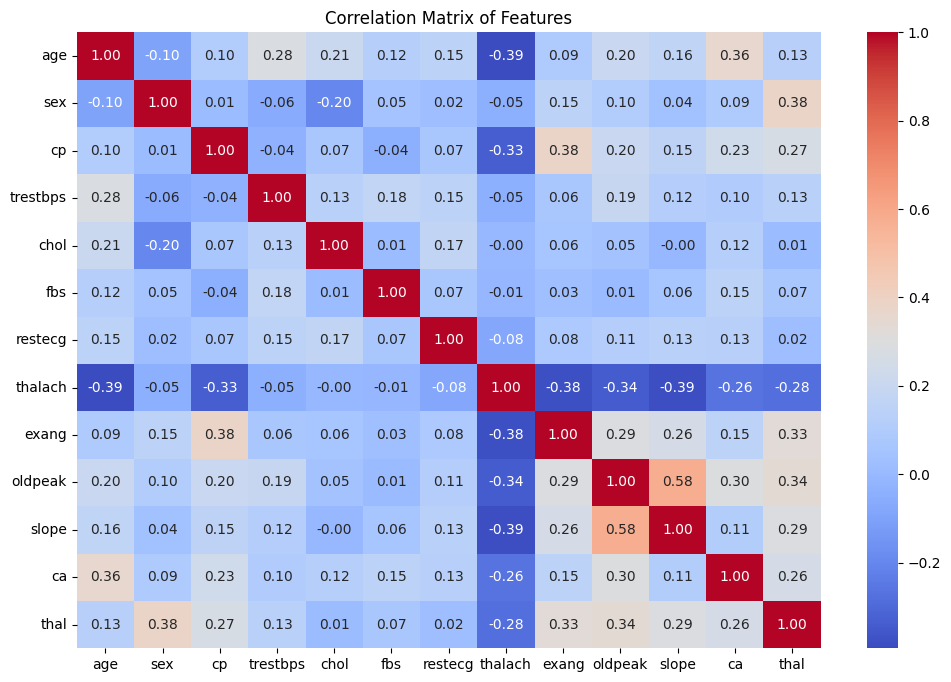

In [15]:

correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Features")
plt.show()

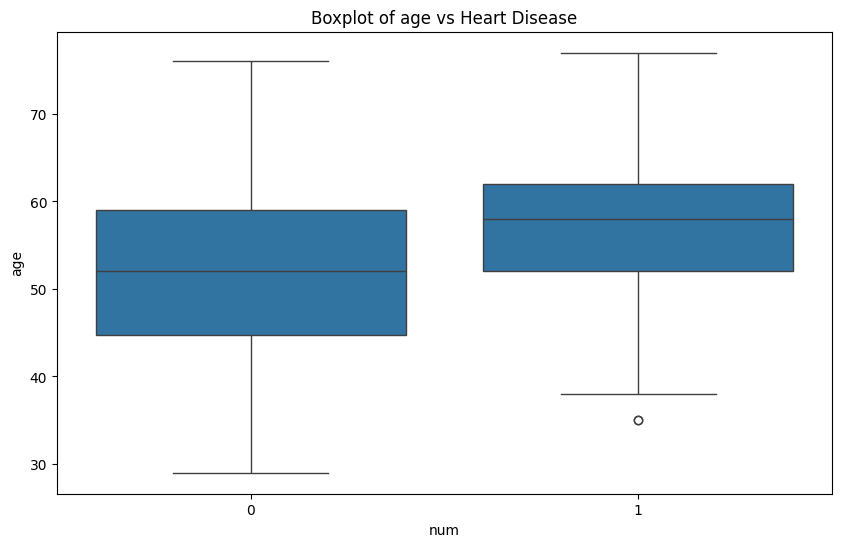

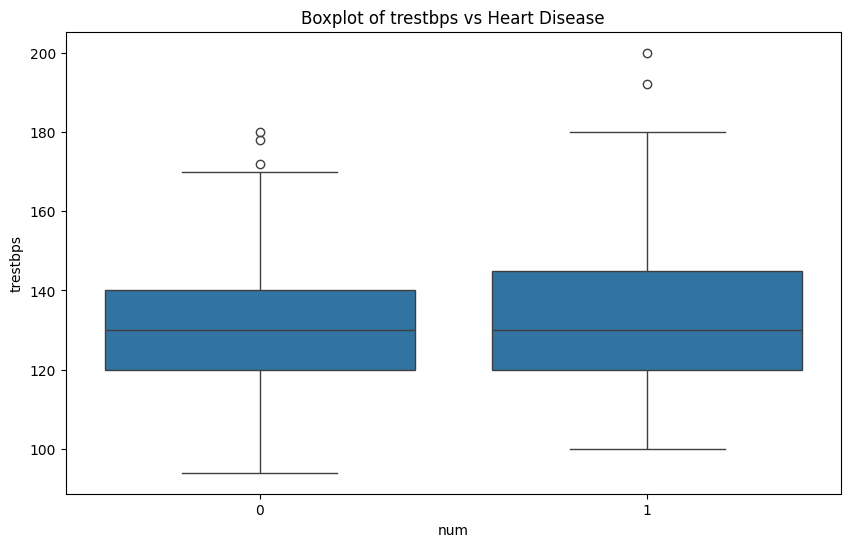

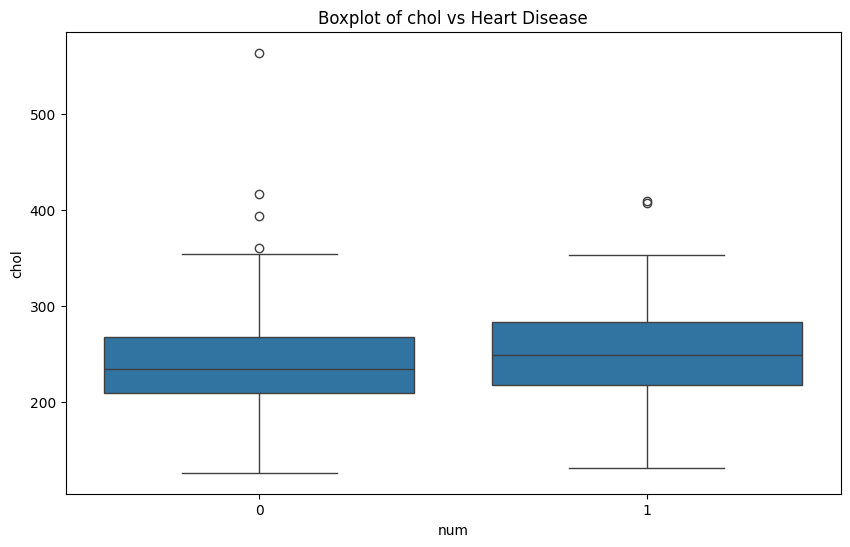

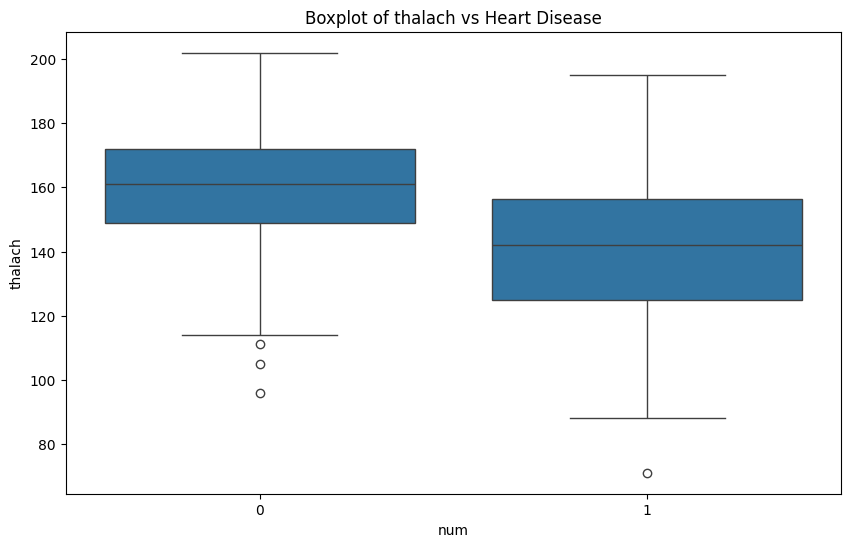

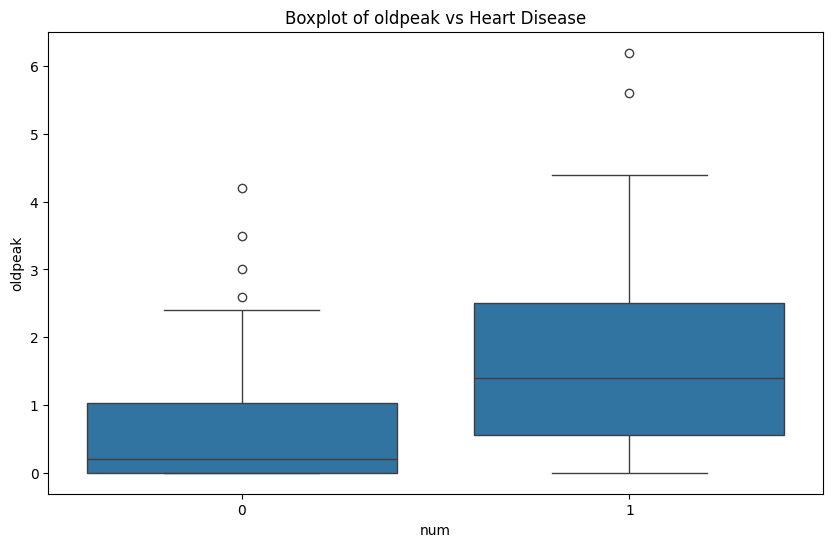

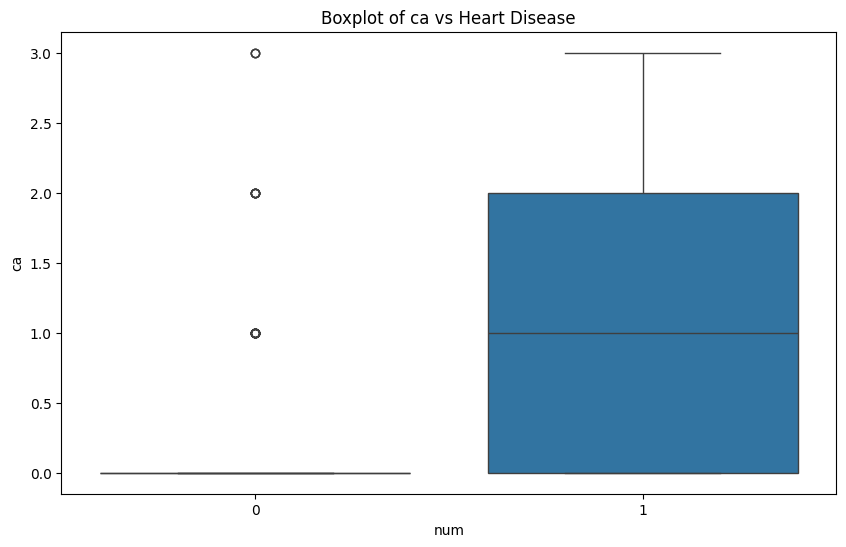

In [16]:
num_features = ["age", "trestbps", "chol", "thalach", "oldpeak","ca"]
for feature in num_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=y['num'], y=X[feature])
    plt.title(f"Boxplot of {feature} vs Heart Disease")
    plt.show()

Here above are some of the relationships between the numerical features and the target variable: some of them, e.g.`trestbps`, `chol`, does not appear to have a strong relationship with the target variable. While others, e.g. `age`, `thalach`, `oldpeak`, appear to have a strong relationship with the target variable. It is worth noting that the `ca` feature has very distiguished distribution between the two classes. This suggests that it may be a good candidate for feature selection or extraction.

6. Drop the rows with the missing values. How many osbervations after dropping the missing
values. Skip the outlier analysis.

In [17]:
X_cleaned = X.dropna()
print(X_cleaned.shape[0])


297


The number of obsercvations remaining in this dataset after removing the missing values is 297. 

7. Sub-group analysis: Explore potential sub-groups within the data using appropriate data
science methods. Identify and visualize these sub-groups without using the labels and categorical variables. Categroical variables already define sub groups so we don’t need to include them for this analysis.

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned[num_features])

# Apply K-Means clustering
#Since we have a binary response, We can assume the correct number of cluster should be 2.
kmeans2 = KMeans(n_clusters=2, random_state=1)
clusters2 = kmeans2.fit_predict(X_scaled)
print(silhouette_score(X_scaled, clusters2).round(2))

kmeans3 = KMeans(n_clusters=3, random_state=1)
clusters3 = kmeans3.fit_predict(X_scaled)
print(silhouette_score(X_scaled, clusters3).round(2))

kmeans4 = KMeans(n_clusters=4, random_state=1)
clusters4 = kmeans4.fit_predict(X_scaled)
print(silhouette_score(X_scaled, clusters4).round(2))



0.22
0.18
0.17


Since the average silhouette score is decreasing as number of cluster increasing from 2 to 4, we this confirms our prediction that k=2 is the best choice. 

C:\Users\zhang\AppData\Local\Temp\ipykernel_29288\37680409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned['Cluster'] = clusters2


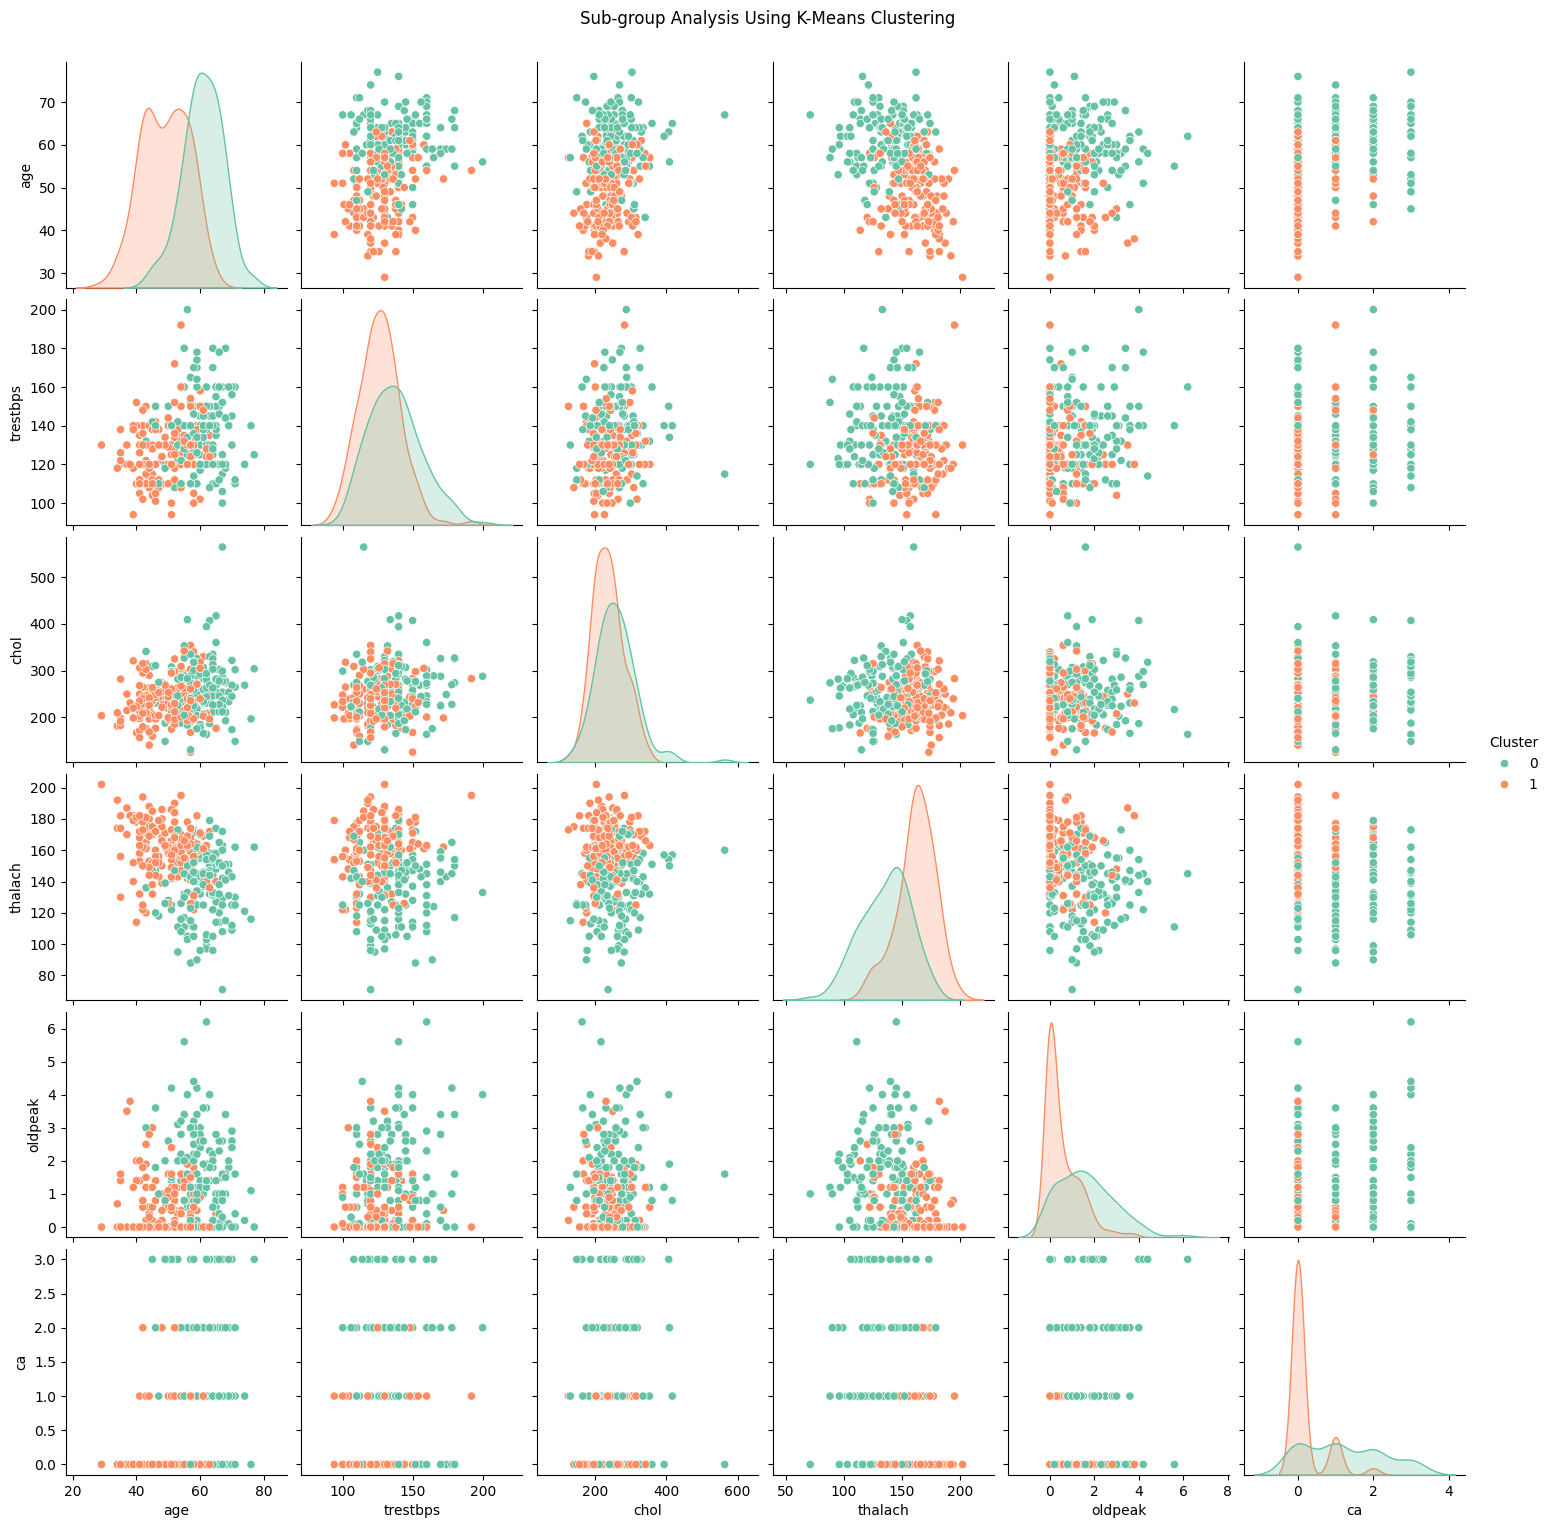

In [19]:
# Add cluster labels to the dataset
X_cleaned['Cluster'] = clusters2

# Visualize the clusters using a pairplot
sns.pairplot(X_cleaned, vars=num_features, hue='Cluster', palette='Set2', diag_kind='kde')
plt.suptitle("Sub-group Analysis Using K-Means Clustering", y=1.02)
plt.show() # Copilot used

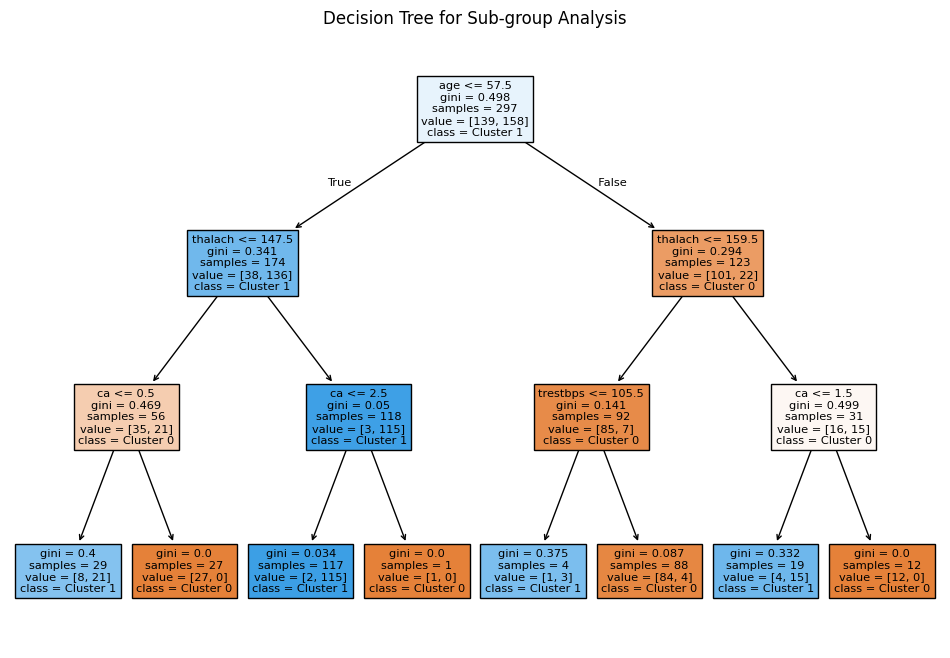

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=1)
tree_clf.fit(X_cleaned[num_features], X_cleaned['Cluster'])

plt.figure(figsize=(12, 8))
plot_tree(tree_clf, feature_names=num_features, class_names=["Cluster 0", "Cluster 1"], filled=True)
plt.title("Decision Tree for Sub-group Analysis")
plt.show()
# Copilot used

8. Split 30% of the data for testing using a random seed of 1. Use the remaining 70% for training and model selection.

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y.loc[X_cleaned.index], test_size=0.3, random_state=1)

9. Identify the two classifiers you have chosen. Justify your selections based on the classifier requirement for this assignment.

I have chosen K-means clustering and classification tree classifiers. 

I chose K-means clustering method because of its simplicity and non-parametric nature. It is easy to understand and interpret. It does not assume a certain distribution which makes it effective to classify patients with similar features into similar disease severity.

I chose classification tree method because it can be interpreted easily. How a prediction is made can be easily traced and effectively communicated to non-technical audience.

10. Specify two metrics to compare classifier performance. Provide technical details on how each metric is computed.

MCR (Misclassification Rate) and F1 score. 

MCR is the proportion of misclassified predictions made by the classifier. It is calculated by using the sum of False Positives and False Negatives divided by th total number of predictions.

F1 score is the harmonic mean of precision and recall. In binary classification, it is calculated as 2 * (True Positives) / (2 * True Positives + False Positives + False Negatives).

11. Train two selected classifiers in (9) and identify optimal tuning parameters (if applicable) using the training set.

In [22]:
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train[num_features])

kmeans2 = KMeans(n_clusters=2, random_state=1)
clusters2 = kmeans2.fit_predict(X_scaled)
print(silhouette_score(X_scaled, clusters2).round(2))

kmeans3 = KMeans(n_clusters=3, random_state=1)
clusters3 = kmeans3.fit_predict(X_scaled)
print(silhouette_score(X_scaled, clusters3).round(2))

kmeans4 = KMeans(n_clusters=4, random_state=1)
clusters4 = kmeans4.fit_predict(X_scaled)
print(silhouette_score(X_scaled, clusters4).round(2))

0.24
0.19
0.17


Since the average silhouette score is decreasing as number of cluster increasing from 2 to 4, we this confirms our prediction that k=2 is the best choice. 

In [23]:
X_test_scaled = scaler.transform(X_test[num_features])
pred_m2 = kmeans2.predict(X_test_scaled)
cross_tab = pd.crosstab(
    index=pred_m2,
    columns=y_test['num'],
    rownames=['Cluster'],
    colnames=['Heart Disease']
)
print(cross_tab )

Heart Disease   0   1
Cluster              
0              16  28
1              35  11


In [24]:
from sklearn.model_selection import cross_val_score

depth_range = range(1, 20)
cv_scores = []
for k in depth_range:
    dt = DecisionTreeClassifier(
        criterion='gini', # growing tree based on gini index
        random_state=0, 
        max_depth=k
        )
    
    # 5-fold cross-validation using accuracy. We choose to use 5-fold is becasue we have a small data set (around 300 observations).
    cv_scores_k = cross_val_score(
        dt,
        X_train,
        y_train,
        cv=5,
        # accuracy for classification on the hold-out folds
        scoring='accuracy'  
    )
    
    # append the average accuracy across all folds
    cv_scores.append(np.mean(cv_scores_k))

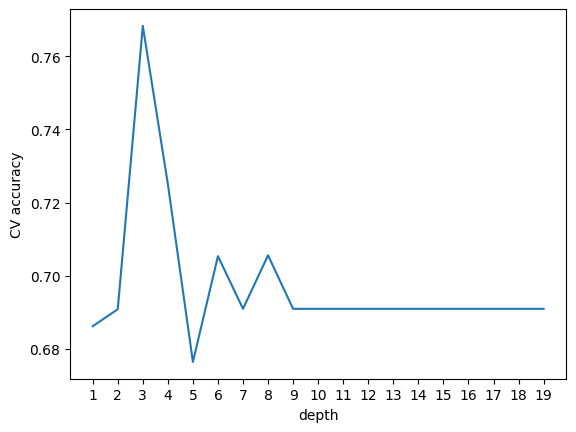

In [25]:
plt.plot(depth_range, cv_scores)
plt.xlabel('depth')
plt.ylabel('CV accuracy')
plt.xticks(range(1,20))
plt.show()

In [26]:
tree_clf = DecisionTreeClassifier(max_depth=6, random_state=1)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=1)

In [27]:
pred_t1 = tree_clf.predict(X_test)

cm = pd.DataFrame(confusion_matrix(y_test, pred_t1), index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'True'
cm.columns.name = 'Predicted'
cm

Predicted,No,Yes
True,,
No,38,13
Yes,10,29


12. Apply a feature selection or extraction method to one of the classifiers in (9). Train this third classifier on the training set and identify optimal tuning parameters (if applicable) using the training set.

In [28]:
feature_importances = tree_clf.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = X_train.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

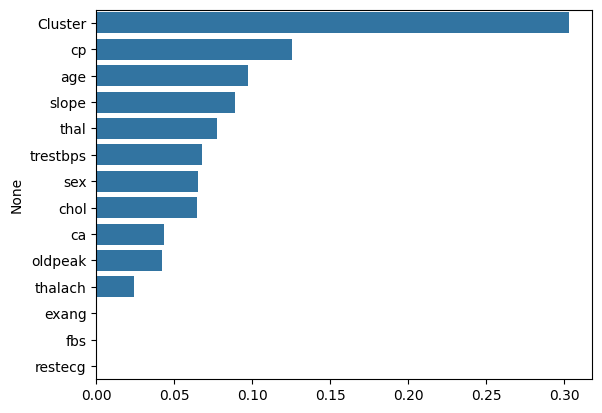

In [29]:
sns.barplot(x = sorted_importances, y = sorted_feature_names)
plt.show()

Based on the plot above we know that "age", "trestbps", and "fbs" are more important on predicting heart disease. Therefore, we choose to selected "age", "trestbps", and "fbs" and do furture analyze with them. 

In [30]:
selected_features = ["age", "trestbps", "fbs"]
X_train_N = X_train[selected_features].copy()
X_test_N = X_test[selected_features].copy()

In [31]:
depth_range = range(1, 20)
cv_scores_N = []
for k in depth_range:
    dt = DecisionTreeClassifier(
        criterion='gini', # growing tree based on gini index
        random_state=0, 
        max_depth=k
        )
    
    # 5-fold cross-validation using accuracy. We choose to use 5-fold is becasue we have a small data set (around 300 observations).
    cv_scores_k = cross_val_score(
        dt,
        X_train_N,
        y_train,
        cv=5,
        # accuracy for classification on the hold-out folds
        scoring='accuracy'  
    )
    
    # append the average accuracy across all folds
    cv_scores_N.append(np.mean(cv_scores_k))

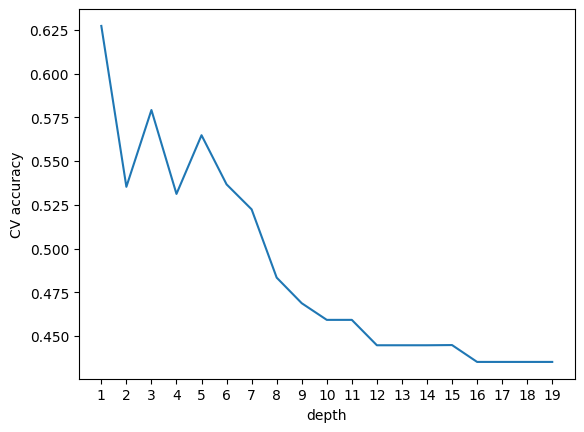

In [32]:
plt.plot(depth_range, cv_scores_N)
plt.xlabel('depth')
plt.ylabel('CV accuracy')
plt.xticks(range(1,20))
plt.show()

In [33]:
tree_clf2 = DecisionTreeClassifier(max_depth=1, random_state=1)
tree_clf2.fit(X_train_N, y_train)

DecisionTreeClassifier(max_depth=1, random_state=1)

In [34]:
pred_t2 = tree_clf2.predict(X_test_N)

cm2 = pd.DataFrame(confusion_matrix(y_test, pred_t2), index=['No', 'Yes'], columns=['No', 'Yes'])
cm2.index.name = 'True'
cm2.columns.name = 'Predicted'
cm2

Predicted,No,Yes
True,,
No,29,22
Yes,10,29


13. Use the selected metrics to evaluate three classifiers in (11) and (12) on the test set.
    - Discuss your findings (at least two statements).
    - Discuss the impact of feature selection or extraction on the performance of the classifier (at least one statement).

In [35]:
print("Origin Decision Tree")
print(classification_report(y_test, pred_t1))
print("Decision Tree after feature selection")
print(classification_report(y_test, pred_t2))
print("K-means clustering with k = 2")
print(classification_report(y_test, pred_m2))

Origin Decision Tree
              precision    recall  f1-score   support

           0       0.79      0.75      0.77        51
           1       0.69      0.74      0.72        39

    accuracy                           0.74        90
   macro avg       0.74      0.74      0.74        90
weighted avg       0.75      0.74      0.75        90

Decision Tree after feature selection
              precision    recall  f1-score   support

           0       0.74      0.57      0.64        51
           1       0.57      0.74      0.64        39

    accuracy                           0.64        90
   macro avg       0.66      0.66      0.64        90
weighted avg       0.67      0.64      0.64        90

K-means clustering with k = 2
              precision    recall  f1-score   support

           0       0.36      0.31      0.34        51
           1       0.24      0.28      0.26        39

    accuracy                           0.30        90
   macro avg       0.30      0.30      

From the output of the above table, we can clearly see that the prediction results of Decision Tree are much better than those of K-means clustering. Decision Tree has an accuracy of 0.73 and 0.64 before and after feature selection, which is 1-0.73=0.27 and 1-0.64=0.36 MCR (Misclassification Rate), which is much better than K-means clustering's MCR of 1-0.3=0.7. In addition, Decision Tree's f1-score is also much higher than K-means clustering.

Comparing the results of Decision Tree before and after feature selection, we can find that after feature selection, MCR has a significant increase and f1-score has a significant decrease, which indicates that we may have removed a variable that is relatively important for prediction.

14. For the best interpretable model identified in (13), analyze and interpret the most important predictor variables in the context of the classification challenge (at least two statements).

Based on the result in part 13 the best model is origin decision tree.

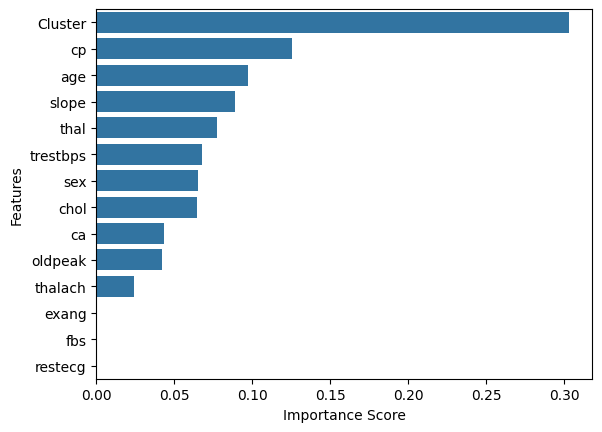

In [36]:
sns.barplot(x = sorted_importances, y = sorted_feature_names)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

By the important plot we know that the most important numerical feature is age. This result is in line with our expectations. As people age, their body functions decline significantly. Therefore, a large number of heart disease patients are elderly or close to the elderly.

15. **[Bonus]** Sub-group improvement strategy: If sub-groups were identified, propose and implement a method to further improve the performance of **one** classifier. Compare the fourth classifier performance with the results from (13).

In [37]:
from sklearn.linear_model import LogisticRegression

kmeans2 = KMeans(n_clusters=2, random_state=1)
clusters2 = kmeans2.fit_predict(X_scaled)
#use the result on sub group 0 and 1 to do the LogisticRegression train and test separately then combine the result in the end.
X_train_0 = X_train.loc[clusters2 == 0, num_features]
y_train_0 = y_train.loc[clusters2 == 0, 'num']
X_train_1 = X_train.loc[clusters2 == 1, num_features]
y_train_1 = y_train.loc[clusters2 == 1, 'num']

LG_0 = LogisticRegression(max_iter=100, random_state=1).fit(X_train_0, y_train_0)
LG_1 = LogisticRegression(max_iter=100, random_state=1).fit(X_train_1, y_train_1)


pred_m2 = kmeans2.predict(X_test_scaled)


y_pred_combined = np.zeros(len(X_test))
y_pred_combined[pred_m2 == 0] = LG_0.predict(X_test.loc[pred_m2 == 0, num_features])
y_pred_combined[pred_m2 == 1] = LG_1.predict(X_test.loc[pred_m2 == 1, num_features])


cross_tab = pd.crosstab(
    index=y_pred_combined,
    columns=y_test['num'],
    rownames=['Cluster'],
    colnames=['Heart Disease']
)
print(cross_tab)

print("Improved K-means clustering with k = 2")
print(classification_report(y_test, y_pred_combined))

Heart Disease   0   1
Cluster              
0.0            34   5
1.0            17  34
Improved K-means clustering with k = 2
              precision    recall  f1-score   support

           0       0.87      0.67      0.76        51
           1       0.67      0.87      0.76        39

    accuracy                           0.76        90
   macro avg       0.77      0.77      0.76        90
weighted avg       0.78      0.76      0.76        90



c:\Users\zhang\Documents\GitHub\Assignment6_Group16\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\zhang\Documents\GitHub\Assignment6_Group16\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

By knowing the subgroups in advance, we apply LogisticRegression to clusters 0 and 1 respectively, and then compare our results. We find that the prediction accuracy has been greatly improved. The MCR and f1-score results are close to or even better than the results of previous the best model origin Decision Tree.

16. **Team Contributions:** Document each team member’s specific contributions to the questions above. For group submissions, this should match the GitHub commit history. Individual submissions do not need to address this question.

Zhiyuan Zhang : Q1 to Q6

Xinzhe Wang   : Q7 to Q11

Hanning Qi    : Q12 to Q15 and some part of Q7 and Q11

17. **Link** to the public GitHub repository. This is optional for the individual submissions.


https://github.com/tazqq/Assignment6_Group16